In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import time
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import roc_curve, accuracy_score, precision_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.feature_selection import RFE, SelectPercentile, f_classif, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from math import sqrt
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.feature_selection import RFE, SelectFromModel
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.neural_network import MLPClassifier

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

Shape of your Data Set: (4653, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


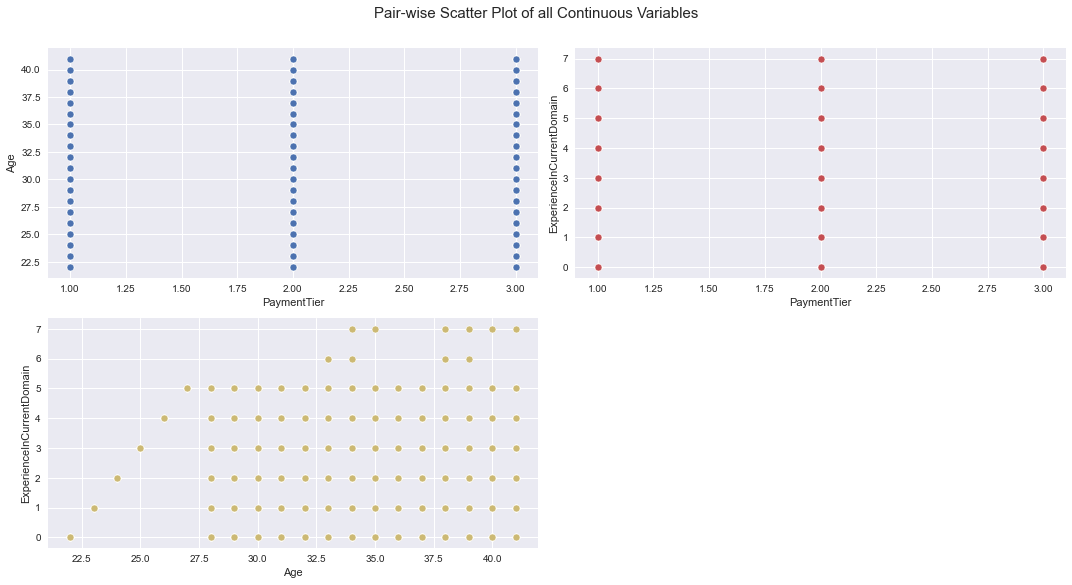

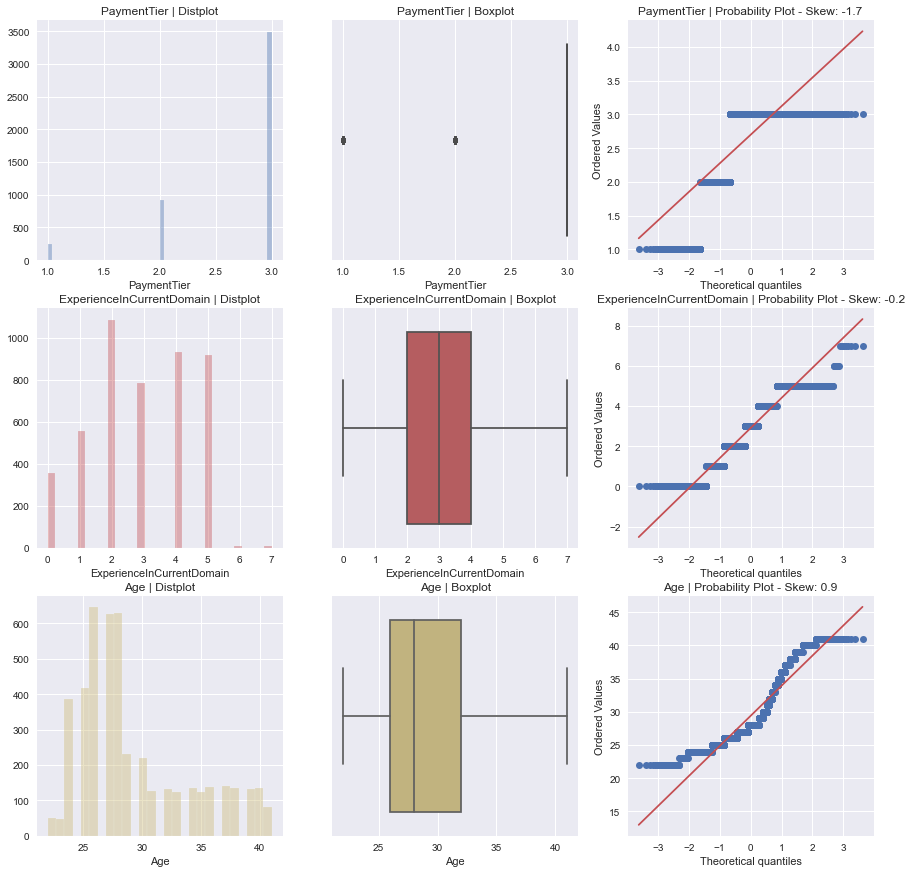

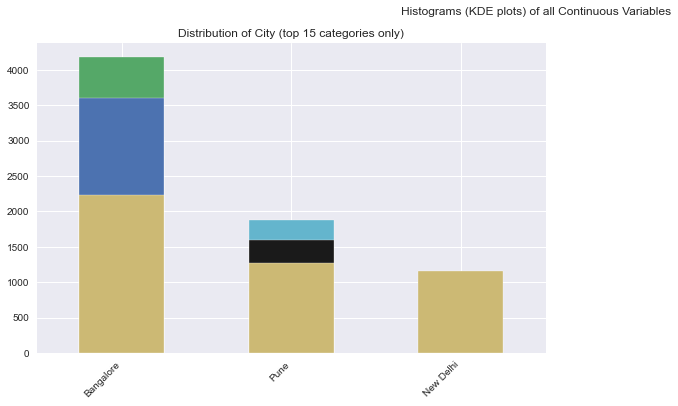

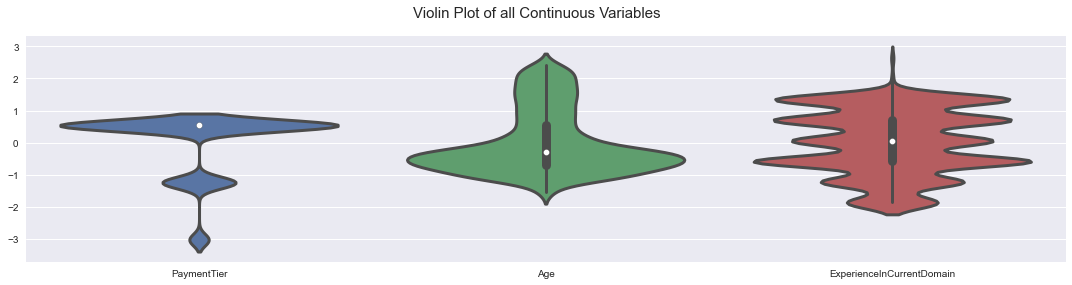

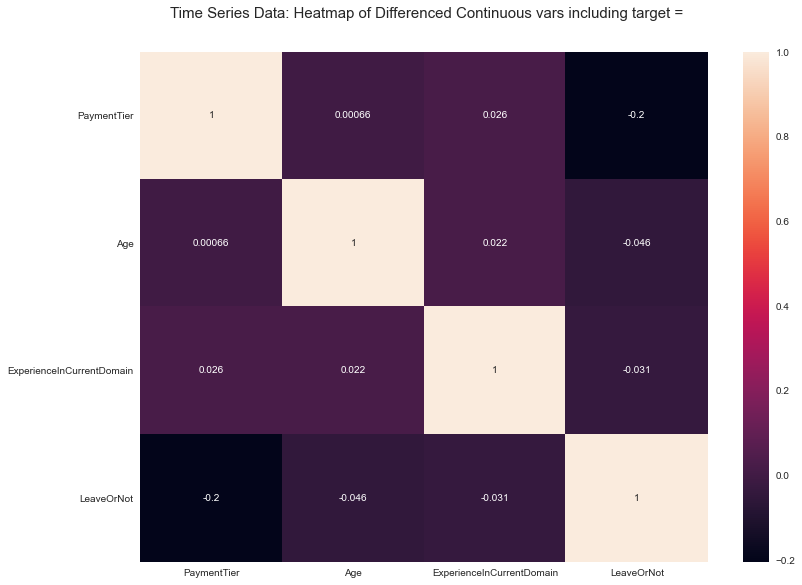

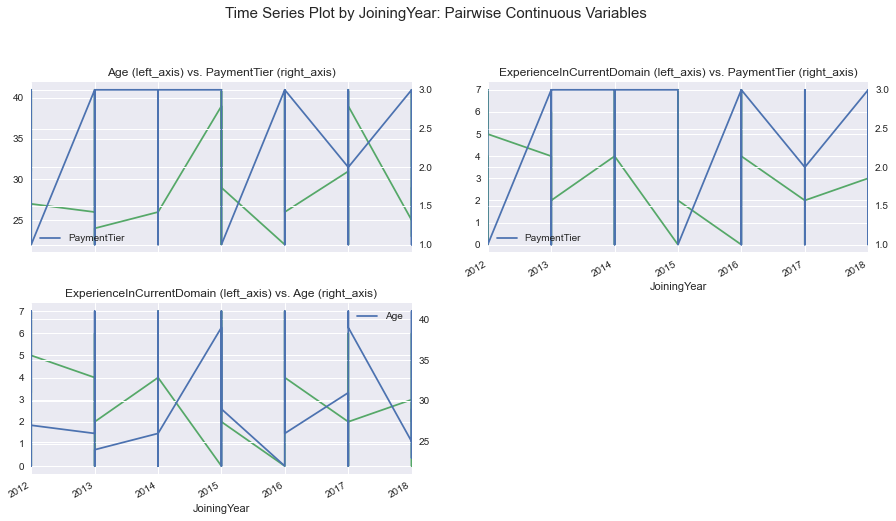

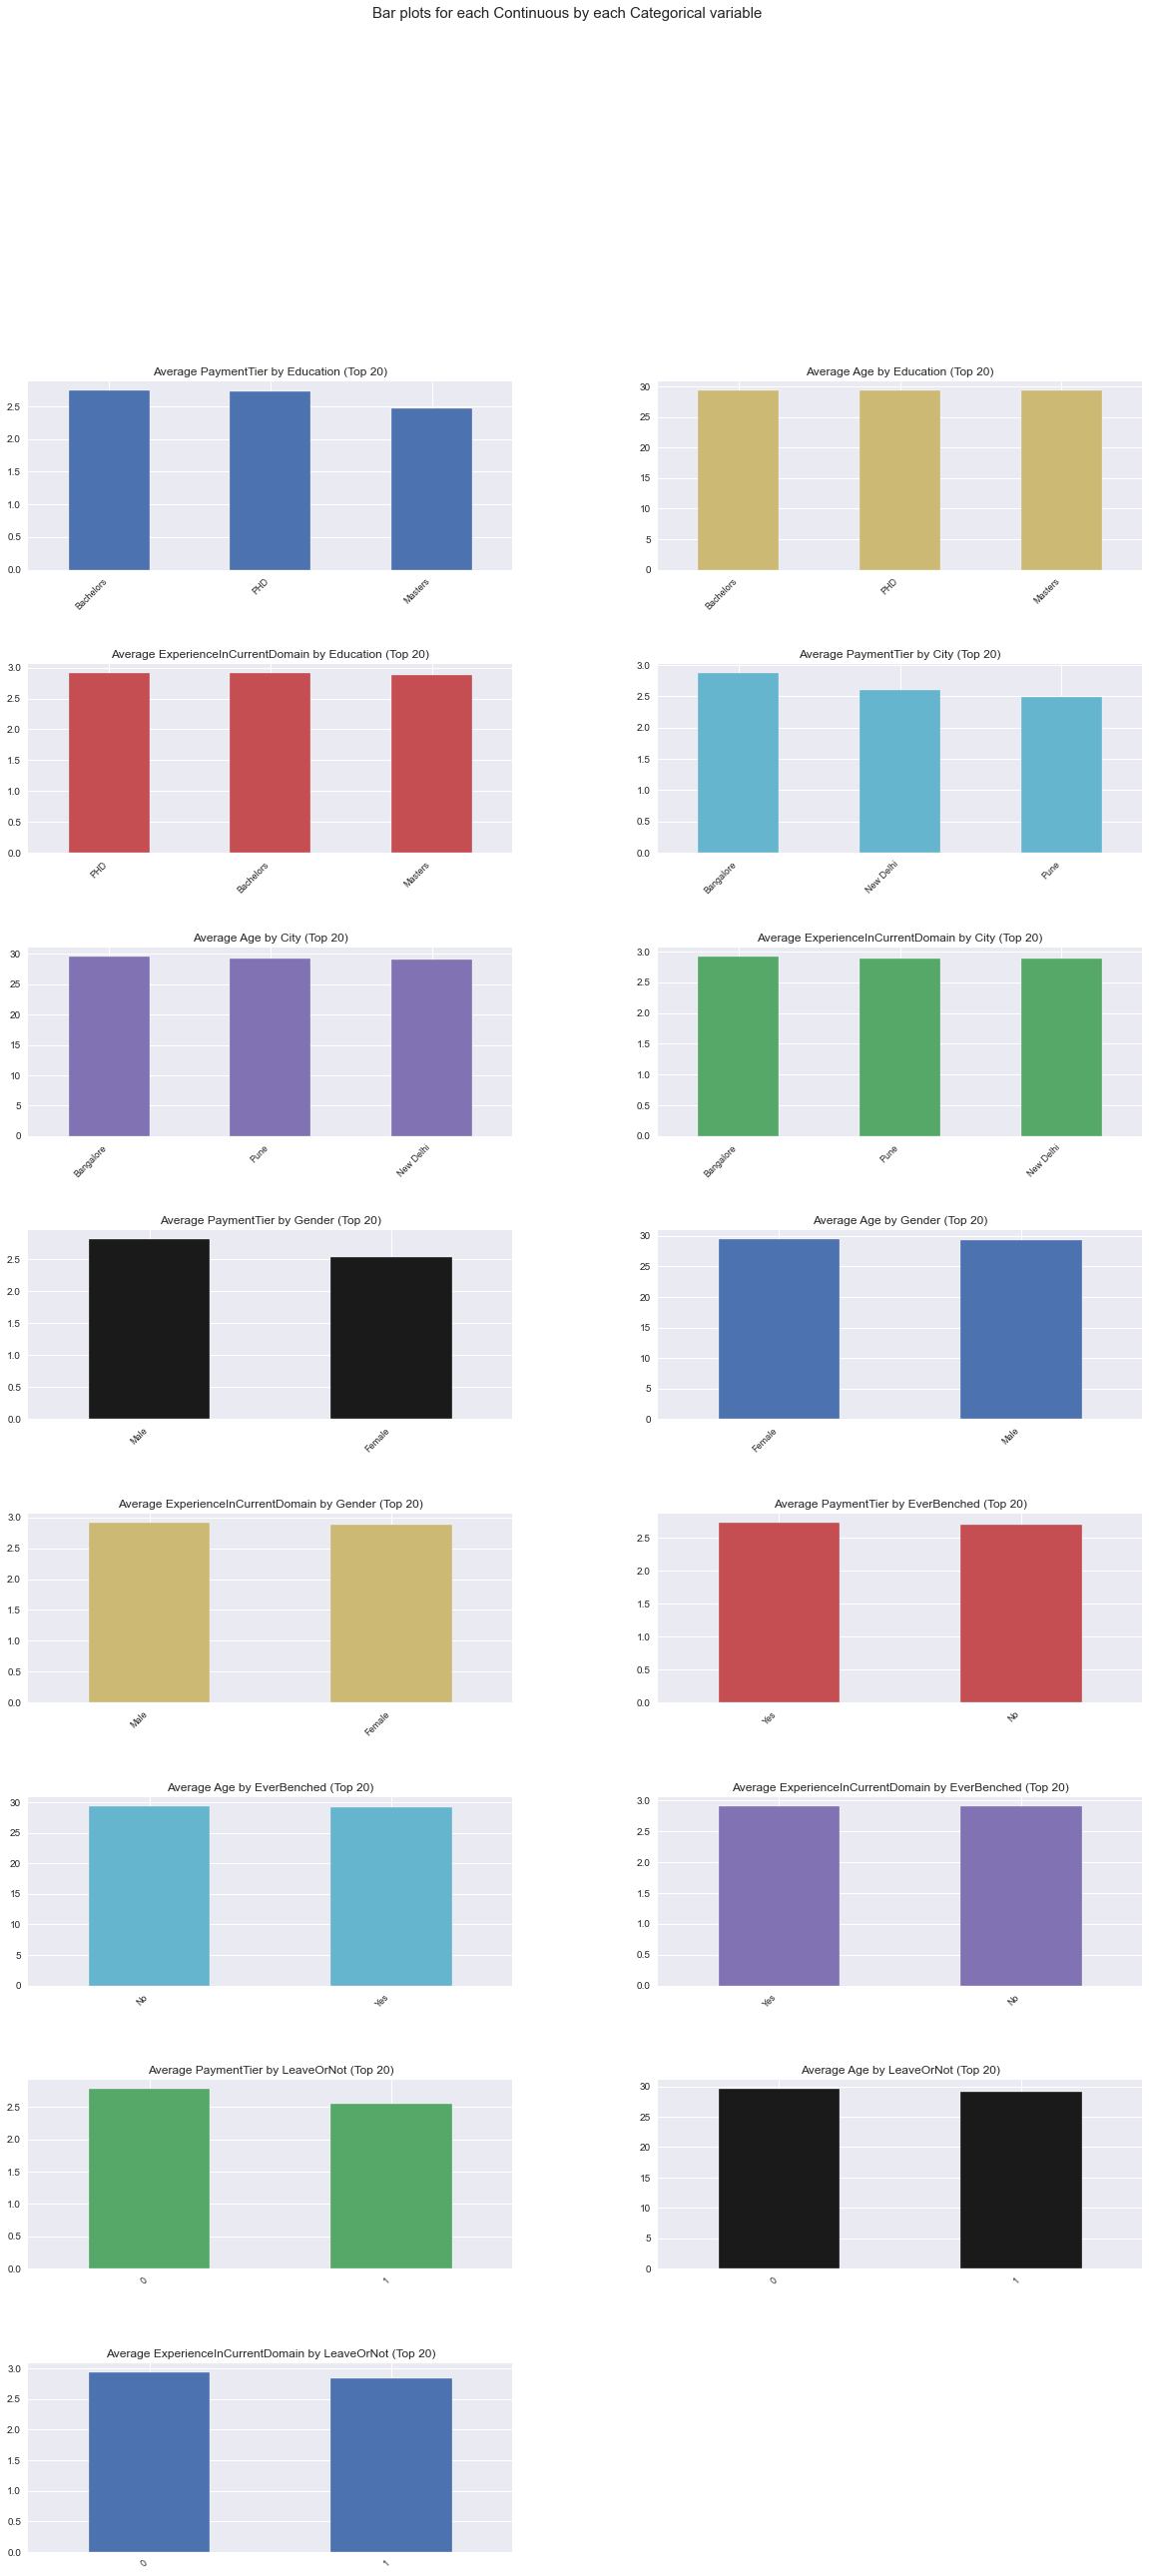

Time to run AutoViz (in seconds) = 8.020

 ###################### VISUALIZATION Completed ########################


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [5]:
AV = AutoViz_Class()
AV.AutoViz('Employee.csv', sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=50)

In [6]:
df.isnull().sum().sort_values(ascending=False)

LeaveOrNot                   0
ExperienceInCurrentDomain    0
EverBenched                  0
Gender                       0
Age                          0
PaymentTier                  0
City                         0
JoiningYear                  0
Education                    0
dtype: int64

In [7]:
df.isna().sum().sort_values(ascending=False)

LeaveOrNot                   0
ExperienceInCurrentDomain    0
EverBenched                  0
Gender                       0
Age                          0
PaymentTier                  0
City                         0
JoiningYear                  0
Education                    0
dtype: int64

In [8]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
print(df['Education'].unique())
# print(df['JoiningYear'].unique())
print(df['City'].unique())
# print(df['PaymentTier'].unique())
# print(df['Age'].unique())
print(df['Gender'].unique())
print(df['EverBenched'].unique())
# print(df['ExperienceInCurrentDomain'].unique())
# print(df['LeaveOrNot'].unique())

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'Pune' 'New Delhi']
['Male' 'Female']
['No' 'Yes']


In [10]:
df['Education'] = le.fit_transform(df['Education'])
df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])

In [11]:
df.dtypes

Education                    int32
JoiningYear                  int64
City                         int32
PaymentTier                  int64
Age                          int64
Gender                       int32
EverBenched                  int32
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

In [12]:
df.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,0.793681,2.698259,29.393295,0.597034,0.102729,2.905652,0.343864
std,0.52112,1.863377,0.841979,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.00000,2015.000000,1.000000,3.000000,28.000000,1.000000,0.000000,3.000000,0.000000
75%,0.00000,2017.000000,2.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,2.00000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


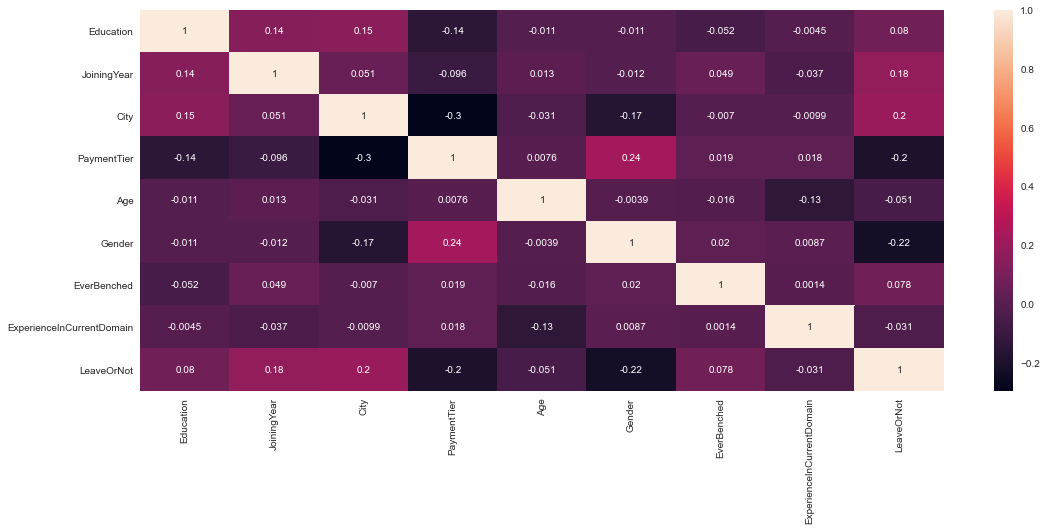

In [14]:
corr = df.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

In [15]:
y = df['LeaveOrNot']
X = df.drop('LeaveOrNot', axis = 1)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10086)

In [57]:
# LR

LRstart_time = datetime.now()
logRegModel = LogisticRegression(random_state=5, solver='liblinear').fit(X_train, y_train)
logRegModel.score(X_train, y_train)
y_predict = logRegModel.predict(X_test)
lrcm = confusion_matrix(y_test,y_predict)

print('Speed:', datetime.now() - LRstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, logRegModel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(lrcm))
print("Classification Report:")
print(classification_report(y_test, y_predict))

Speed: 0:00:00.024972
Accuracy: 0.7089151450053706
Precision: 0.6374269005847953
Recall: 0.34276729559748426
Mean Squared Error: 0.29108485499462944
ROC AUC Score: 0.6719671491777703
Confusion Matrix:
     0    1
0  551   62
1  209  109
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       613
           1       0.64      0.34      0.45       318

    accuracy                           0.71       931
   macro avg       0.68      0.62      0.62       931
weighted avg       0.70      0.71      0.68       931



<AxesSubplot:>

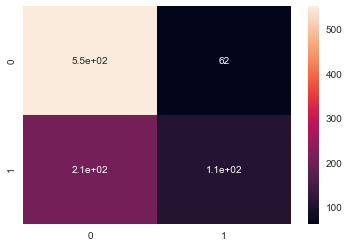

In [18]:
lrc = sns.heatmap(lrcm, annot=True)
lrc

In [19]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596391
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             LeaveOrNot   No. Observations:                 3722
Model:                          Logit   Df Residuals:                     3714
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.07384
Time:                        13:54:28   Log-Likelihood:                -2219.8
converged:                       True   LL-Null:                       -2396.7
Covariance Type:            nonrobust   LLR p-value:                 1.780e-72
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Education                     0.2102      0.067      3.117      0.002       0.

In [20]:
print(result.pvalues)

Education                    1.827555e-03
JoiningYear                  8.678391e-05
City                         7.001315e-14
PaymentTier                  2.815062e-11
Age                          6.641231e-03
Gender                       3.433506e-22
EverBenched                  8.894839e-08
ExperienceInCurrentDomain    1.752624e-01
dtype: float64


In [21]:
logRegImp = logRegModel.coef_[0]
logRegImp

array([ 2.03443524e-01,  6.85444065e-04,  3.27433426e-01, -4.70475651e-01,
       -2.11236741e-02, -7.56870864e-01,  4.13739653e-01, -3.12531999e-02])

In [22]:
for i,v in enumerate(logRegImp):
    print('Feature: %0d, Score: %.9f' % (i,v))

Feature: 0, Score: 0.203443524
Feature: 1, Score: 0.000685444
Feature: 2, Score: 0.327433426
Feature: 3, Score: -0.470475651
Feature: 4, Score: -0.021123674
Feature: 5, Score: -0.756870864
Feature: 6, Score: 0.413739653
Feature: 7, Score: -0.031253200


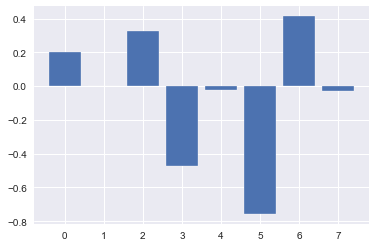

In [23]:
# plot feature importance
plt.bar([x for x in range(len(logRegImp))], logRegImp)
plt.show()

In [24]:
np.round(logRegModel.coef_, decimals=2) > 0

array([[ True, False,  True, False, False, False,  True, False]])

In [25]:
LRCols = X.columns

In [26]:
predictors = X_train
selector = RFE(logRegModel, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [27]:
order = selector.ranking_
order

array([5, 8, 4, 3, 7, 1, 2, 6])

In [28]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}. {df.columns[i]}")
sorted(feature_ranks)

['1. JoiningYear',
 '2. City',
 '3. PaymentTier',
 '4. Age',
 '5. Gender',
 '6. EverBenched',
 '7. ExperienceInCurrentDomain',
 '8. LeaveOrNot']

In [29]:
df_cof_LR = pd.Series(logRegImp,LRCols)

<AxesSubplot:>

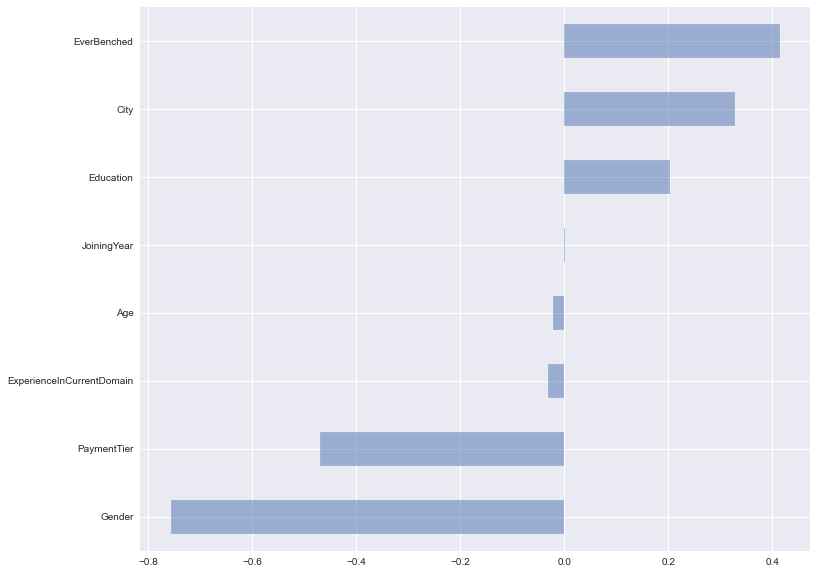

In [30]:
df_cof_LR.sort_values().plot(kind='barh', figsize=(12, 10), alpha=0.5)

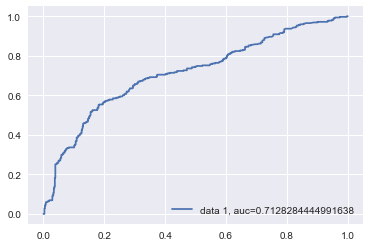

In [31]:
y_pred_proba = logRegModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
# DT
DTstart_time = datetime.now()

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train, y_train)
dty_predict = treemodel.predict(X_test)
dtcm = confusion_matrix(y_test,dty_predict)

print('Speed:', datetime.now() - DTstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, dty_predict))
print("Precision:",metrics.precision_score(y_test, dty_predict))
print("Recall:",metrics.recall_score(y_test, dty_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, dty_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, treemodel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(dtcm))
print("Classification Report:")
print(classification_report(y_test, dty_predict))

1: Leave
0: Not Leave

Speed: 0:00:00.007978
Accuracy: 0.799140708915145
Precision: 0.8195121951219512
Recall: 0.5283018867924528
Mean Squared Error: 0.200859291084855
ROC AUC Score: 0.7852043425999335
Confusion Matrix:
     0    1
0  576   37
1  150  168
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       613
           1       0.82      0.53      0.64       318

    accuracy                           0.80       931
   macro avg       0.81      0.73      0.75       931
weighted avg       0.80      0.80      0.79       931



<AxesSubplot:>

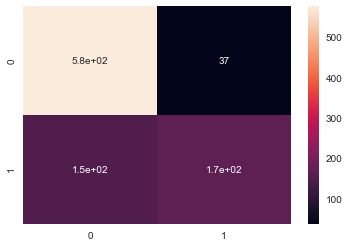

In [33]:
dtc = sns.heatmap(dtcm, annot=True)
dtc

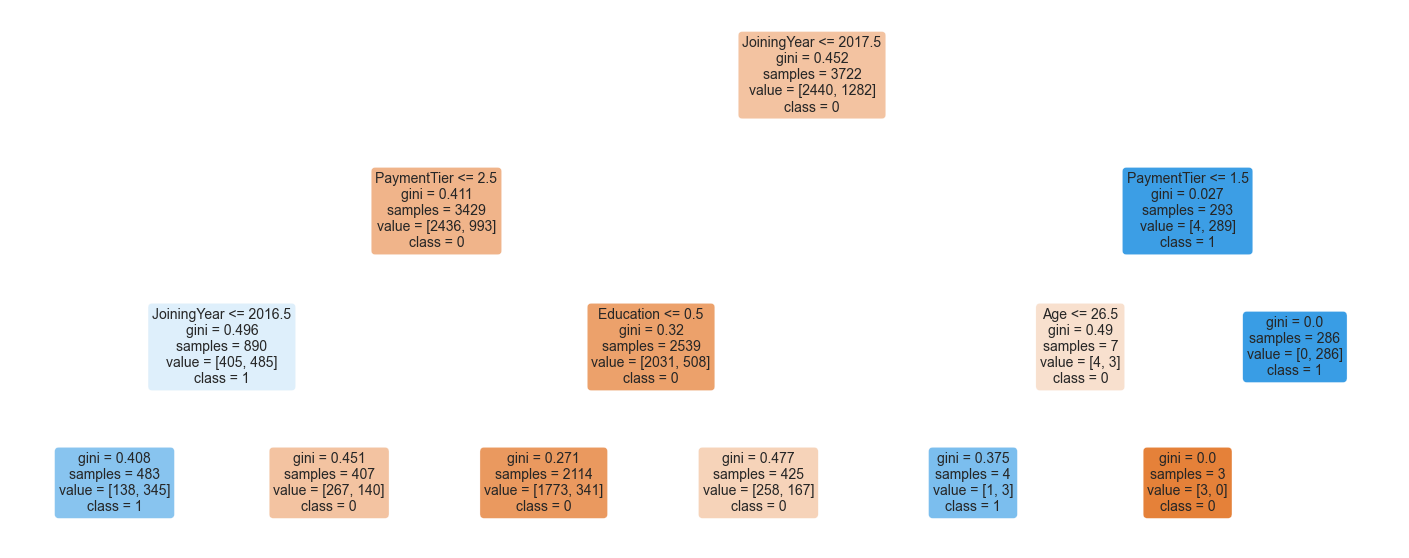

In [34]:
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=X.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)
plt.show()

In [35]:
dtimp = treemodel.feature_importances_
df_cof_DT = pd.Series(dtimp,X.columns)
df_cof_DT

Education                    0.072497
JoiningYear                  0.616033
City                         0.000000
PaymentTier                  0.307788
Age                          0.003682
Gender                       0.000000
EverBenched                  0.000000
ExperienceInCurrentDomain    0.000000
dtype: float64

<AxesSubplot:>

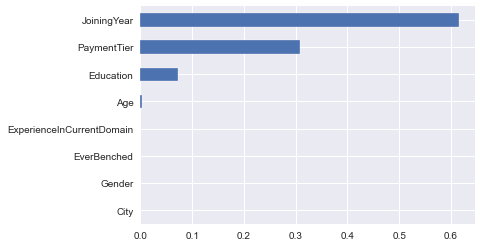

In [36]:
df_cof_DT.head(18).sort_values().plot.barh()

In [37]:
# RF
RFstart_time = datetime.now()

rfclass=RandomForestClassifier(n_estimators=20,random_state=0)
rfclass.fit(X_train, y_train)
rfypred=rfclass.predict(X_test)
rfclass.score(X_test, y_test)
rfcm = confusion_matrix(y_test,rfypred)

print('Speed:', datetime.now() - RFstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, rfypred))
print("Precision:",metrics.precision_score(y_test, rfypred))
print("Recall:",metrics.recall_score(y_test, rfypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, rfypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, rfclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(rfcm))
print("Classification Report:")
print(classification_report(y_test, rfypred))

Speed: 0:00:00.099444
Accuracy: 0.8378088077336198
Precision: 0.8081180811808119
Recall: 0.6886792452830188
Mean Squared Error: 0.16219119226638024
ROC AUC Score: 0.9776728856039487
Confusion Matrix:
     0    1
0  561   52
1   99  219
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       613
           1       0.81      0.69      0.74       318

    accuracy                           0.84       931
   macro avg       0.83      0.80      0.81       931
weighted avg       0.84      0.84      0.83       931



<AxesSubplot:>

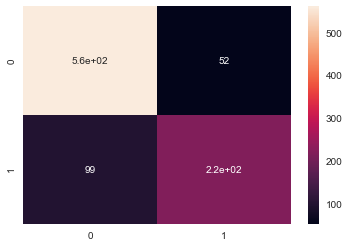

In [38]:
rfc = sns.heatmap(rfcm, annot=True)
rfc

In [39]:
rfimp = rfclass.feature_importances_
df_cof_RF = pd.Series(rfimp,X.columns)
df_cof_RF

Education                    0.101928
JoiningYear                  0.332817
City                         0.106035
PaymentTier                  0.093654
Age                          0.176458
Gender                       0.090226
EverBenched                  0.019098
ExperienceInCurrentDomain    0.079783
dtype: float64

<AxesSubplot:>

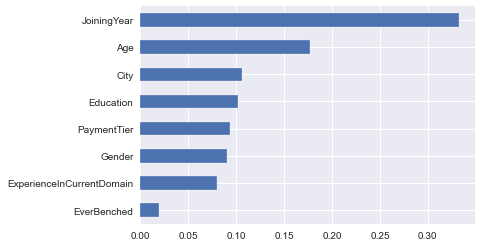

In [40]:
df_cof_RF.head(18).sort_values().plot.barh()

In [64]:
# NN
NNstart_time = datetime.now()

nnclass=MLPClassifier(3,solver='lbfgs', learning_rate_init= 0.01, max_iter=100).fit(X_train, y_train)
nnypred=nnclass.predict(X_test)
nnclass.score(X_test, y_test)
nnclass.predict_proba(X_test[:1])
nncm = confusion_matrix(y_test,nnypred)

print('Speed:', datetime.now() - NNstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, nnypred))
print("Precision:",metrics.precision_score(y_test, nnypred))
print("Recall:",metrics.recall_score(y_test, nnypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, nnypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, nnclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(nncm))
print("Classification Report:")
print(classification_report(y_test, nnypred))

Speed: 0:00:00.039894
Accuracy: 0.6584317937701396
Precision: 0.0
Recall: 0.0
Mean Squared Error: 0.34156820622986034
ROC AUC Score: 0.5
Confusion Matrix:
     0  1
0  613  0
1  318  0
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       613
           1       0.00      0.00      0.00       318

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



<AxesSubplot:>

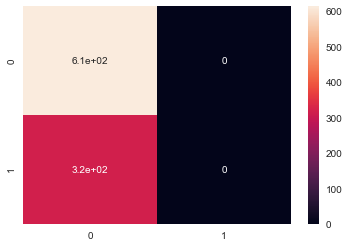

In [49]:
nnc = sns.heatmap(nncm, annot=True)
nnc

In [50]:
nnclass.coefs_

[array([[-3.60297760e-01, -2.42959166e-01, -3.11409480e-01],
        [-7.14953611e-03, -7.54310104e+01, -4.64026472e+02],
        [ 4.34959864e-01, -6.44433482e-01, -1.62477630e-01],
        [-5.11304035e-01,  2.92576635e-01, -3.19776481e-01],
        [-3.22186688e-01, -1.14352462e+00, -7.40035480e+00],
        [ 7.09588646e-01,  4.66898628e-01,  2.94632982e-01],
        [-6.09790460e-01, -6.88622684e-01, -5.29520674e-01],
        [ 7.55104880e-02, -4.55778545e-01, -4.77912942e-01]]),
 array([[  -1.03800057],
        [  42.73095736],
        [-437.24343824]])]

In [51]:
nnclass.intercepts_

[array([-0.73369861, -0.11808632, -0.00393295]), array([-0.63738998])]

In [52]:
nnclass.classes_

array([0, 1], dtype=int64)